
# Linear regression example using Spike-Slab Prior

The model equation is y = ax + b with a, b being the model parameters, while the
likelihood model is based on a normal zero-mean additive model error distribution. The problem is solved via sampling using emcee.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from scipy.stats import invgamma, halfcauchy, norm, bernoulli, uniform

In [2]:
def log_prior(theta):
    if theta[0] < 0.0 or theta[0] > 1.0:
        return -np.Inf
    return bernoulli.logpmf(0 if theta[0] < 0.5 else 1, p = 0.2)
            
nwalkers = 2
ndim = 1
start_parameters = np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_prior)
sampler.run_mcmc(start_parameters, 5000, progress=True)

100%|██████████| 5000/5000 [00:01<00:00, 3105.04it/s]


State([[0.35296681]
 [0.25704727]], log_prob=[-0.22314355 -0.22314355], blobs=None, random_state=('MT19937', array([ 398631447, 3605042557, 1997001849, 3734734222,  161181420,
       1849445272, 2748774356, 1522502327, 3588024164,  451653540,
       1460611357, 2214563923, 3184755118, 3419585164, 4167405667,
       3636393957, 1880367612, 3024523215, 2931259370, 3180636403,
       4113500325, 2700335816, 2168299077, 2946565028, 3721964366,
       1360396446,  336379953, 2510143980, 2843857267, 4284678392,
       2269544683, 3552213854, 4086328170, 1778852550,  518264542,
       3138570759, 3052611067, 2057470659, 1990841169, 2063274938,
       3436103767, 1177045203,  607779514, 1637961702, 3506382701,
       3197068335, 3921297659,  657724634, 2327548114, 2994110583,
        434713773, 3198521190, 1459070516, 3674254680, 2975359405,
       4178066323, 1754907587,  320523404, 1922291683, 2993882976,
       1625537544, 1492931631, 1030663523, 2667048009, 1630353447,
       2991853680, 1

Plotting the trace of the chain

In [3]:
samples = sampler.get_chain(discard=500, thin=15, flat=True)
sum(samples > 0.5)/len(samples)

array([0.22166667])

TypeError: 'AxesSubplot' object is not subscriptable

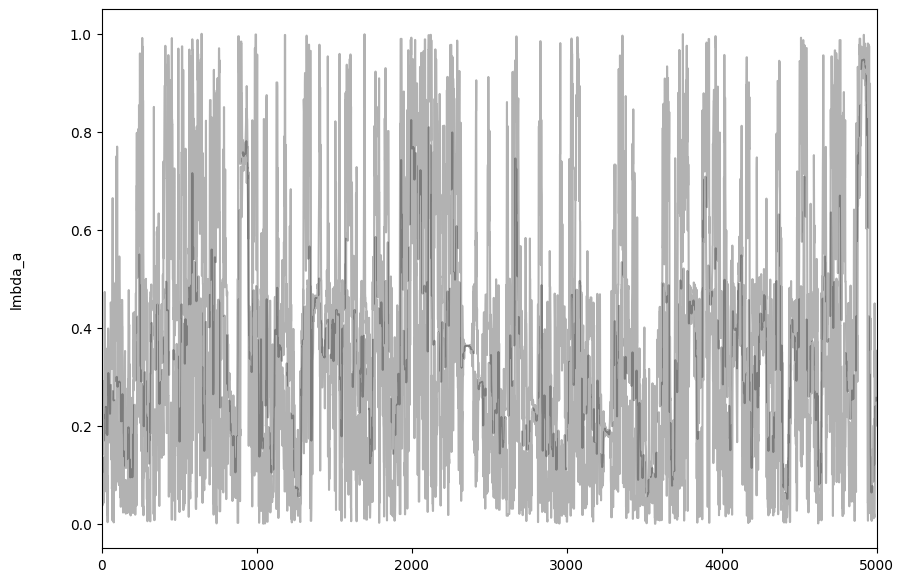

In [7]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["lmbda_a"] # Change the labels over here if changes in parameters are made in json file.
for i in range(ndim):
    ax = axes
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

Plotting the pair-plot of the chain.

In [ ]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)
import corner
labels = ["lmbda_a"]  # Change the labels over here if changes in parameters are made in json file.
fig = corner.corner(
    flat_samples, labels=labels, truths=[1]
)